In [2]:
import pandas as pd

In [3]:
df_clientes_cadastrados = pd.read_csv("https://github.com/cmattosr/bootcampDS_mod06/raw/main/dados/clientes_cadastrados.csv")

In [4]:
df_clientes_cadastrados.shape

(438557, 18)

In [5]:
#Verificar se há clientes repetidos
df_clientes_cadastrados["ID_Cliente"].value_counts()

7045794    2
7636389    2
7046068    2
7052812    2
7742298    2
          ..
5709384    1
5727815    1
5729862    1
6780485    1
6293503    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [6]:
#Há clientes repetidos neste dataframe (ID_Cliente)

#Verificar se ha linhas duplicadas (utilizamos o sum, se houver duplicatas será somado o valor 1 para cada ocorrência)
df_clientes_cadastrados.duplicated().sum()

0

In [7]:
#não há linhas duplicadas

#verificar quanto são os clientes repetidos, o keep=False contabiliza todas as ocorrências com IDs iguais, o valor default True contabiliza apenas a duplicata
df_clientes_cadastrados[df_clientes_cadastrados["ID_Cliente"].duplicated(keep=False)].shape

(94, 18)

In [8]:
#Há 94 clientes repetidos (na verdade 47 aparecem duas vezes)
#Essas linhas serão removidas pois são irrelevantes considerando o total do dataframe (94 repetidos em 438557 linhas), mas serão armazenadas separadamente
id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados["ID_Cliente"].duplicated(keep=False)]["ID_Cliente"]
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

## Desafio 01: Explorar o motivo pelo qual há clientes repetidos no dataframe

In [9]:
#remover as linhas com clientes repetidos, que já estão armazenados em id_repetidos
df_clientes_cadastrados_unicos = df_clientes_cadastrados.drop(id_repetidos.index)
df_clientes_cadastrados_unicos.shape

(438463, 18)

In [10]:
#checar se ainda há clientes repetidos
df_clientes_cadastrados_unicos["ID_Cliente"].value_counts()

6291456    1
6480139    1
6486280    1
5409030    1
6463747    1
          ..
6569516    1
6690720    1
6583845    1
6575649    1
6293503    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [11]:
#verificar se há valores nulos
df_clientes_cadastrados_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [12]:
#não há valores nulos

#analisar o dataframe
df_clientes_cadastrados_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

# Aula 02

## Desafio 02: Explorar as colunas (features), identificar se são contínuas, categóricas ou binárias

In [13]:
colunas_quantitativas = ["Idade", "Qtd_Filhos", "Rendimento_Anual", "Tamanho_Familia", "Anos_empregado"]

In [14]:
df_clientes_cadastrados_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Tamanho_Familia,Anos_empregado
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,2.194461,-165.936036
std,11.472815,0.724879,1.100832e+05,0.897194,380.201131
min,21.000000,0.000000,2.610000e+04,1.000000,-1000.700000
25%,34.000000,0.000000,1.215000e+05,2.000000,1.000000
50%,43.000000,0.000000,1.611000e+05,2.000000,4.000000
75%,53.000000,1.000000,2.250000e+05,3.000000,8.500000
max,69.000000,19.000000,6.750000e+06,20.000000,48.000000


In [15]:
df_clientes_cadastrados_unicos.query("Anos_empregado <= 0")[["Anos_empregado", "Categoria_de_renda"]].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

In [16]:
#provavelmente os clientes Pensionistas foram cadastrados como Anos_empregado = -1000.7, o que está distorcendo nossa coluna Anos_empregado
#vamos substituir esses valores por um valor mais interessante que ainda deixe claro que são Pensionistas
df_clientes_cadastrados_unicos["Anos_empregado"] = df_clientes_cadastrados_unicos["Anos_empregado"].replace(-1000.7, -1)

# Tratando Outliers

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

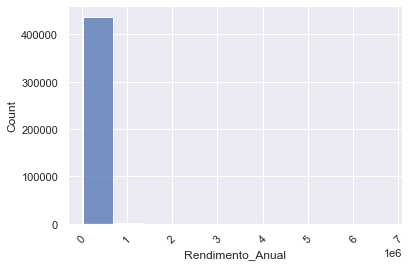

In [18]:
#verificar a distribuição dos Rendimentos Anuais no dataframe
sns.histplot(data=df_clientes_cadastrados_unicos, x="Rendimento_Anual", bins=10)
plt.xticks(rotation=45)
plt.show()

In [19]:
#essa visualização não é interessante porque os outliers estão impactando na visualização dos dados

#Vamos fazer o tratamento dos outliers

#vamos isolar a coluna de Rendimentos_Anuais
coluna = df_clientes_cadastrados_unicos["Rendimento_Anual"]

#calcular a média dos Rendimentos anuais
coluna_media = coluna.mean()
coluna_std = coluna.std()

#calcular o limite superior (média mais duas vezes o desvio padrão)
limite_sup = coluna_media + (coluna_std * 2)

#calcular o limite inferior (média menos duas vezes o desvio padrão)
limite_inf = coluna_media - (coluna_std * 2)

#verificar quais clientes ultrapassam os limites superior e inferior
index_outliers = []
for index, valor in coluna.items():
    if valor > limite_sup or valor < limite_inf:
        index_outliers.append(index)
#quantidade de clientes outliers
len (index_outliers)


#calculamos os outliers através de um intervalo de confiança, neste caso utilizamos acima ou abaixo de 2 vezes o desvio padrão

12641

## Desafio 03: Explorar outras técnicas de identificar e tratar outliers

In [20]:
#criar um dataframe sem os outliers
df_clientes_cadastrados_sem_outliers = df_clientes_cadastrados_unicos.drop(index_outliers)

In [21]:
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

In [22]:
df_clientes_cadastrados_sem_outliers[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Tamanho_Familia,Anos_empregado
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,2.191683,5.744956
std,11.525400,0.723577,75033.530551,0.896300,6.736649
min,21.000000,0.000000,26100.000000,1.000000,-1.000000
25%,34.000000,0.000000,117000.000000,2.000000,1.000000
50%,43.000000,0.000000,157500.000000,2.000000,4.000000
75%,53.000000,1.000000,225000.000000,3.000000,8.500000
max,69.000000,19.000000,405000.000000,20.000000,48.000000


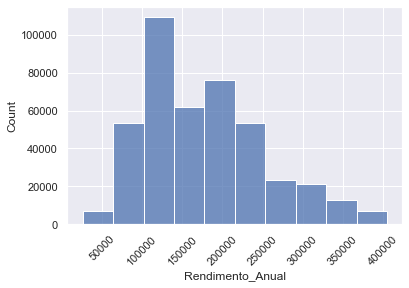

In [24]:
#verificar a distribuição dos Rendimentos Anuais no novo dataframe, sem outliers
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x="Rendimento_Anual", bins=10)
plt.xticks(rotation=45)
plt.show()